# Avacado

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
import warnings
from sklearn.model_selection import cross_val_score
warnings.filterwarnings('ignore')

In [2]:
#Importing the dataset
df= pd.read_csv("avocado.csv")
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
df = df.drop('Unnamed: 0',axis =1 )

In [4]:
df.shape

(18249, 13)

In [5]:
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [6]:
#Extracting day and month from Date
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Day'] = pd.DatetimeIndex(df['Date']).day

In [7]:
df = df.drop("Date",axis =1)
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [8]:
df['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [9]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,6.177215,15.662612
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,3.534130,8.776281
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,3.000000,8.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,6.000000,16.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,9.000000,23.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,12.000000,31.000000


In [10]:
#Check for missing values
df.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
Month           0
Day             0
dtype: int64

In [11]:
df.groupby('year')['Total Volume'].mean()

year
2015    7.810274e+05
2016    8.584206e+05
2017    8.623393e+05
2018    1.066928e+06
Name: Total Volume, dtype: float64

In [12]:
df.groupby('year')['type'].value_counts()

year  type        
2015  conventional    2808
      organic         2807
2016  conventional    2808
      organic         2808
2017  conventional    2862
      organic         2860
2018  conventional     648
      organic          648
Name: type, dtype: int64

In [13]:
df.groupby('year')['Total Volume'].count()

year
2015    5615
2016    5616
2017    5722
2018    1296
Name: Total Volume, dtype: int64

In [14]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


Text(0.5, 1.0, 'Average_Price')

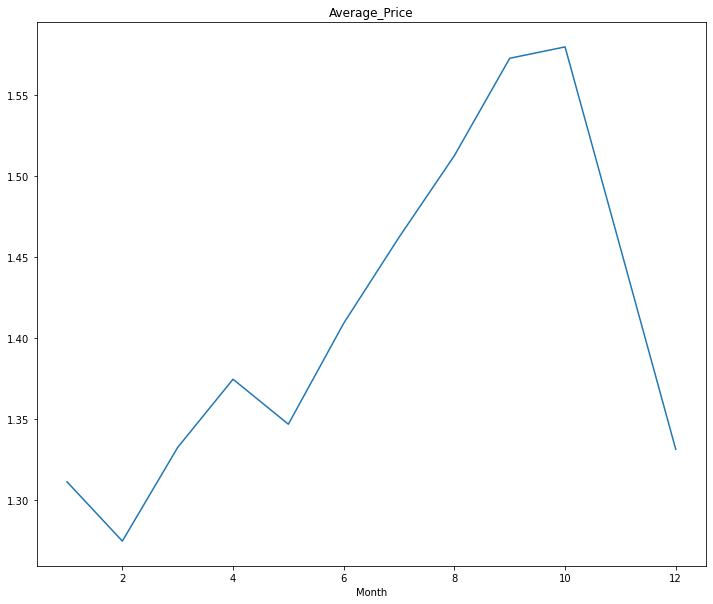

In [15]:
month=df.groupby('Month').mean()
plt.figure(figsize=(12,10))
month['AveragePrice'].plot()
plt.title('Average_Price')

The average price has peaked in the month of October

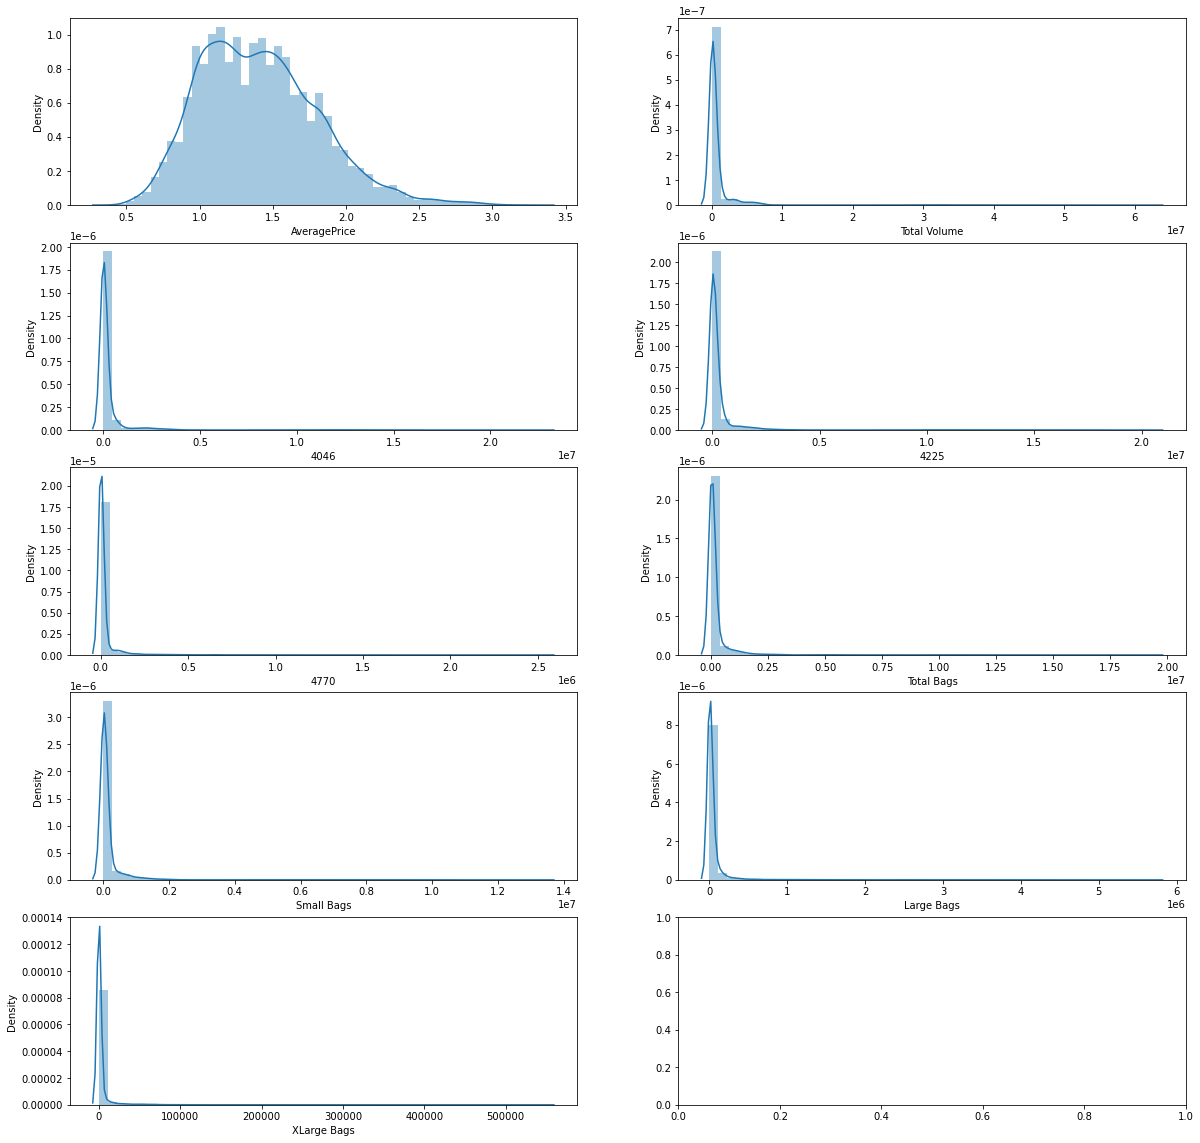

In [16]:
columns = ['AveragePrice','Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']
fig,ax = plt.subplots(5,2,figsize=(20,20))
row = col = 0
for n,i in enumerate(columns):
    if (n%2 == 0) & (n > 0):
        row += 1
        col = 0
    sn.distplot(df[i],kde=True,ax=ax[row,col])
    col += 1

In [17]:
categorical_cols = ['type','region']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in categorical_cols:
    df[i] = le.fit_transform(df[i].astype(str))

In [18]:
df.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type              int32
year              int64
region            int32
Month             int64
Day               int64
dtype: object

In [19]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,11,29


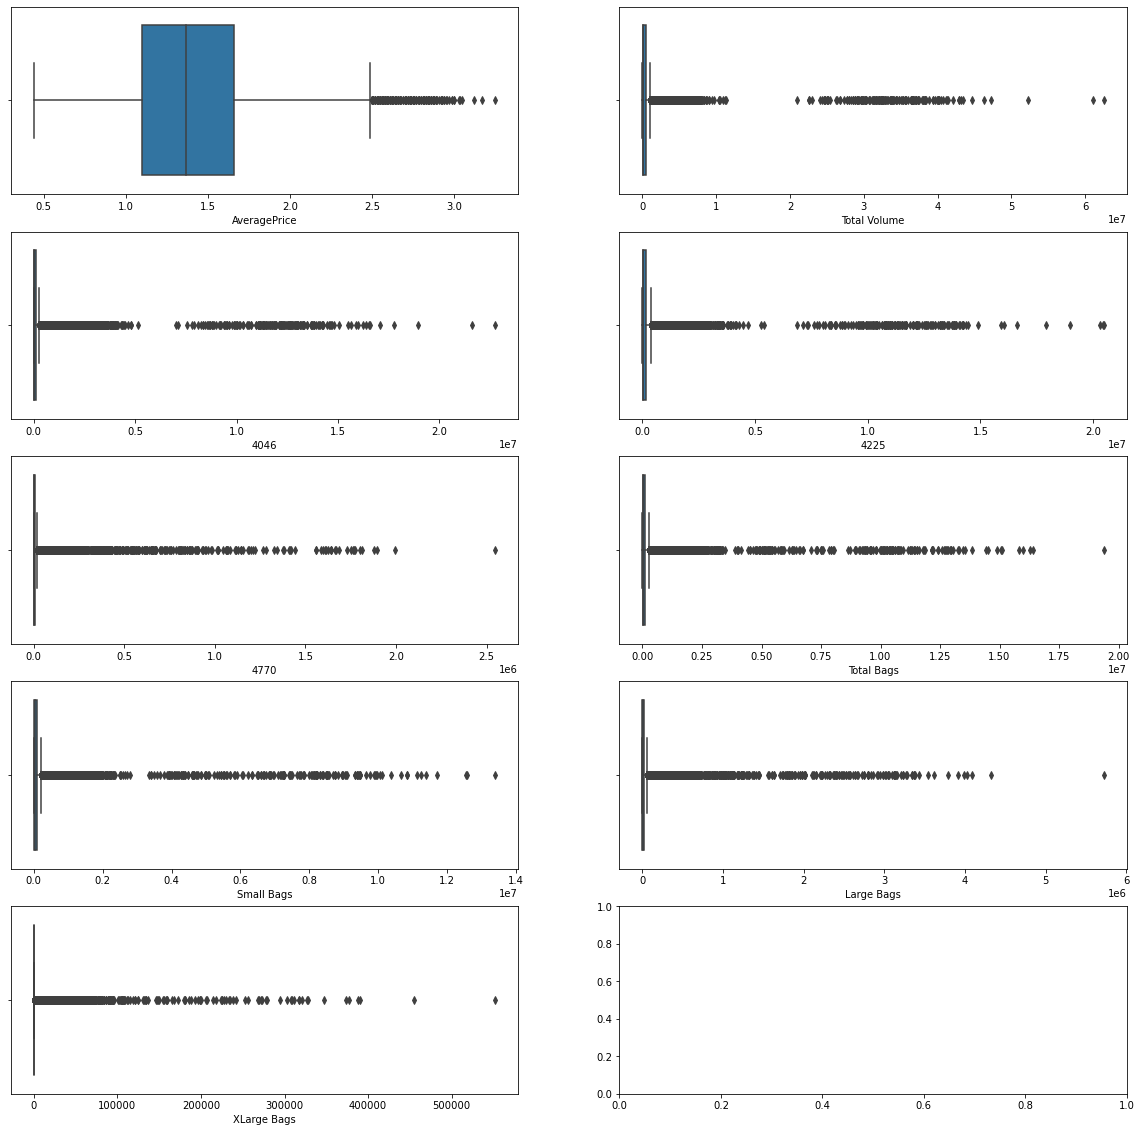

In [20]:
fig,ax = plt.subplots(5,2,figsize=(20,20))
row = col = 0
for n,i in enumerate(columns):
    if (n%2 == 0) & (n > 0):
        row += 1
        col = 0
    sn.boxplot(df[i],ax=ax[row,col])
    col += 1

As from the skewness we can see that there are many outliers in the features as well

In [21]:
df['region'].value_counts()

47    338
31    338
6     338
37    338
21    338
5     338
52    338
36    338
20    338
4     338
51    338
35    338
19    338
3     338
50    338
34    338
18    338
2     338
49    338
33    338
17    338
1     338
48    338
32    338
16    338
22    338
38    338
7     338
27    338
15    338
46    338
30    338
14    338
45    338
29    338
13    338
44    338
28    338
12    338
43    338
11    338
23    338
42    338
26    338
10    338
41    338
25    338
9     338
40    338
24    338
8     338
39    338
0     338
53    335
Name: region, dtype: int64

<AxesSubplot:title={'center':'Comparision between Average Price and Small Bags'}, xlabel='Small Bags', ylabel='AveragePrice'>

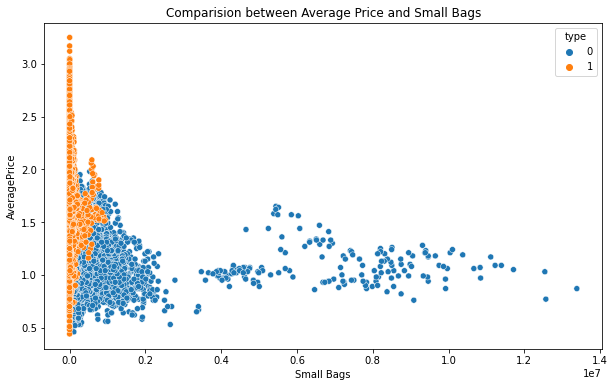

In [22]:
#Bivariate analysis
plt.figure(figsize=[10,6])
plt.title("Comparision between Average Price and Small Bags")
sn.scatterplot(data=df, x="Small Bags", y="AveragePrice", hue="type")

<AxesSubplot:title={'center':'Comparision between Average Price and Small Bags'}, xlabel='Large Bags', ylabel='AveragePrice'>

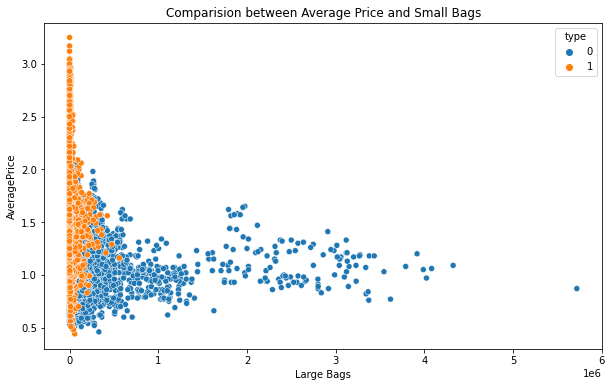

In [23]:
plt.figure(figsize=[10,6])
plt.title("Comparision between Average Price and Small Bags")
sn.scatterplot(data=df, x="Large Bags", y="AveragePrice", hue="type")

<AxesSubplot:title={'center':'Comparision between Average Price and Small Bags'}, xlabel='XLarge Bags', ylabel='AveragePrice'>

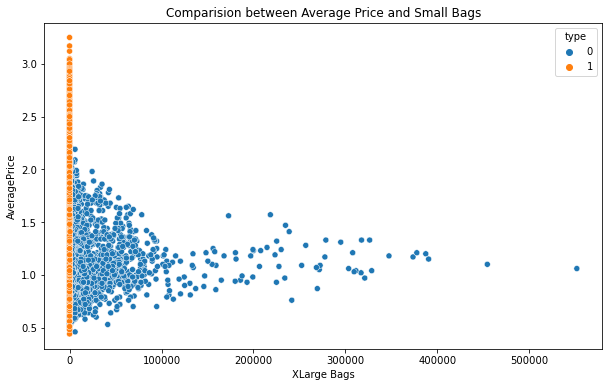

In [24]:
plt.figure(figsize=[10,6])
plt.title("Comparision between Average Price and Small Bags")
sn.scatterplot(data=df, x="XLarge Bags", y="AveragePrice", hue="type")

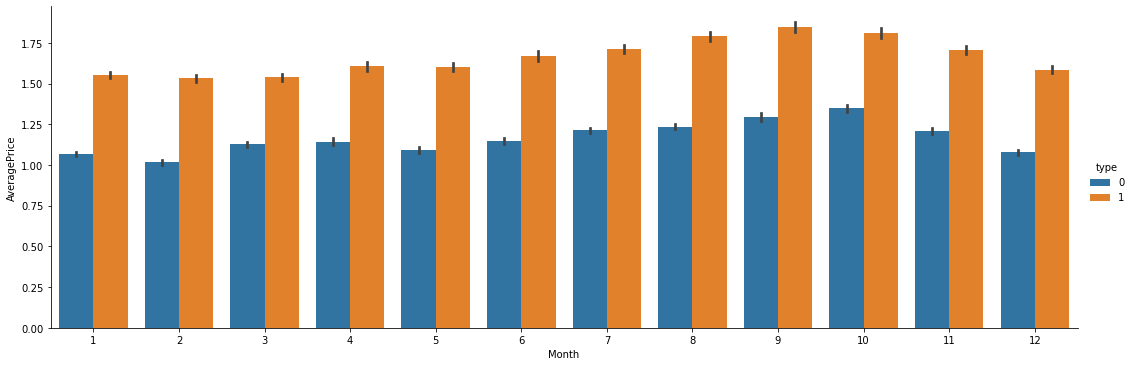

In [25]:
sn.catplot(x="Month", y="AveragePrice", hue="type", kind="bar", data=df,height=5,aspect=3)

In [26]:
cor=df.corr()
cor

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.615845,0.093197,-0.011716,0.162409,0.027386
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,-0.232434,0.017193,0.174176,-0.024689,-0.009747
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,-0.225819,0.003353,0.192073,-0.025803,-0.010159
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.232289,-0.009559,0.145726,-0.022108,-0.012393
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.210027,-0.036531,0.095252,-0.033424,-0.009009
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,-0.217788,0.071552,0.175256,-0.022724,-0.004988
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,-0.220535,0.063915,0.164702,-0.023126,-0.003870
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,-0.193177,0.087891,0.198768,-0.020187,-0.008352
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,-0.175483,0.081033,0.082281,-0.012969,0.000319
type,0.615845,-0.232434,-0.225819,-0.232289,-0.210027,-0.217788,-0.220535,-0.193177,-0.175483,1.000000,-0.000032,-0.000280,-0.000085,-0.000013


<AxesSubplot:>

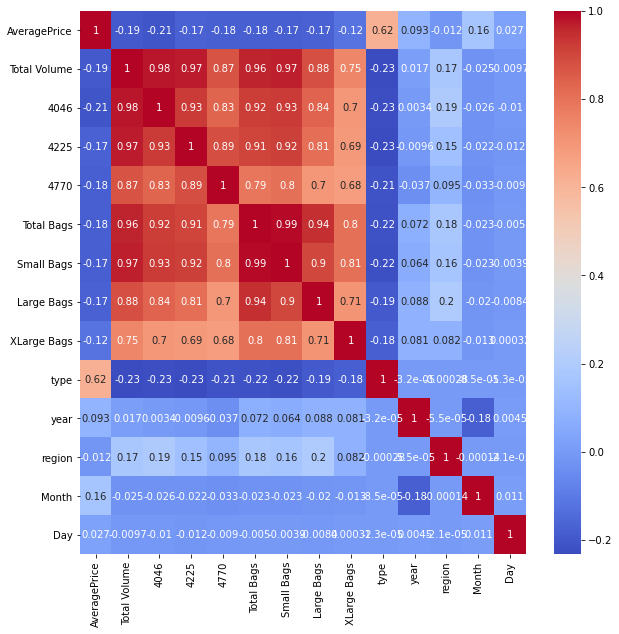

In [27]:
plt.figure(figsize=(10,10))
sn.heatmap(df.corr(),annot=True,cmap='coolwarm')

In [28]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,11,29


In [29]:
from scipy.stats import zscore
z=np.abs(zscore(df))
df_zscore=df[(z<3).all(axis=1)]
df_zscore.shape

(17651, 14)

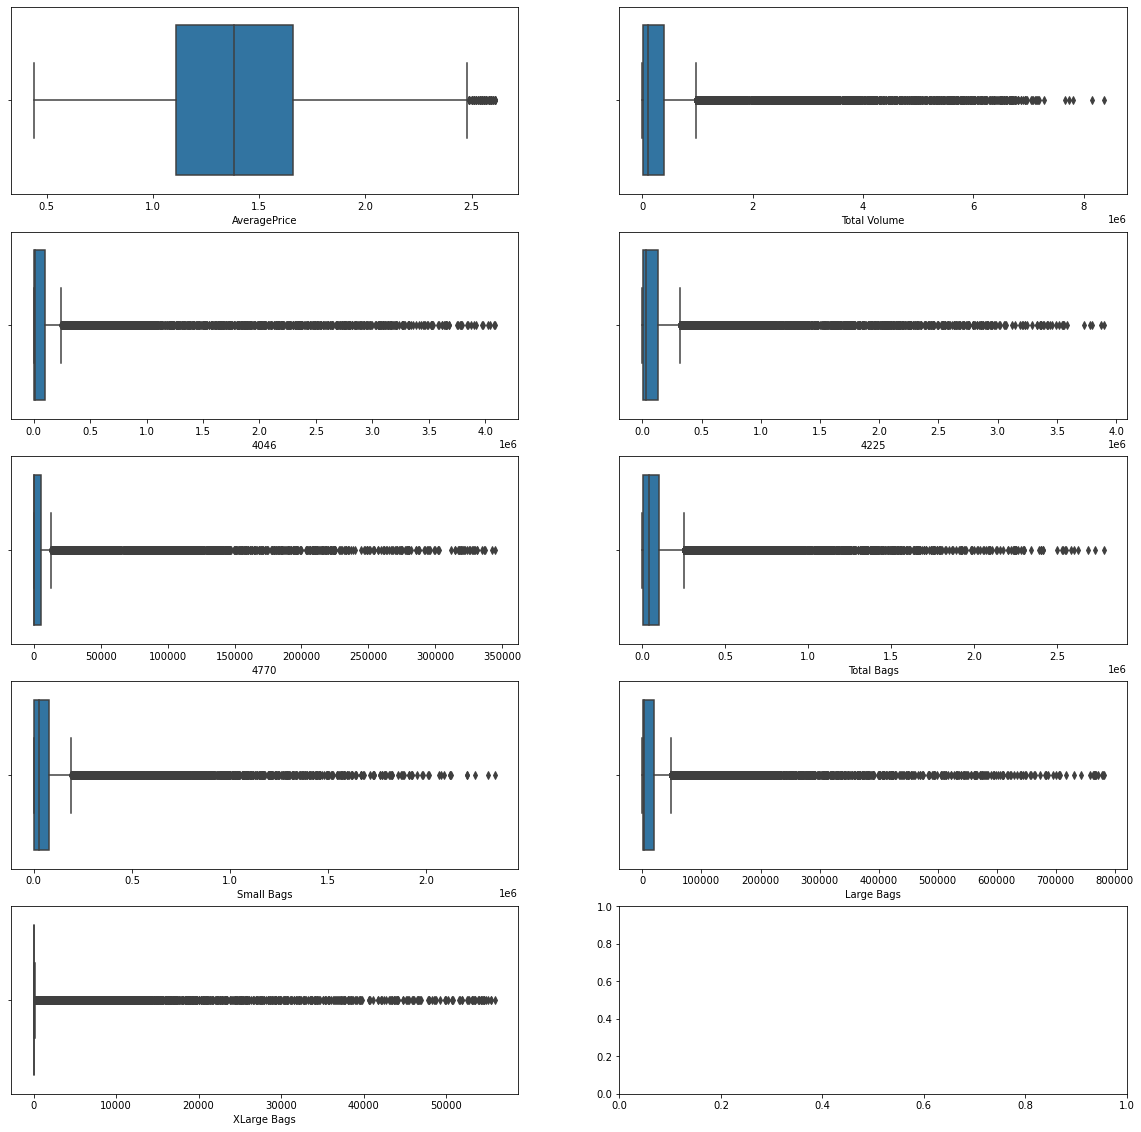

In [30]:
fig,ax = plt.subplots(5,2,figsize=(20,20))
row = col = 0
for n,i in enumerate(columns):
    if (n%2 == 0) & (n > 0):
        row += 1
        col = 0
    sn.boxplot(df_zscore[i],ax=ax[row,col])
    col += 1

In [31]:
print(df_zscore['4225'].mean())
print(df_zscore['4046'].mean())
print(df_zscore['4770'].mean())
print(df_zscore['Total Bags'].mean())
print(df_zscore['Small Bags'].mean())
print(df_zscore['Large Bags'].mean())
print(df_zscore['XLarge Bags'].mean())

165600.94489433893
154643.5751895093
11160.55841085485
129816.01636961184
100628.33843918175
27830.325482408884
1357.3517115177615


In [32]:
df_zscore.loc[df_zscore['4225']<3,'4225'] = np.mean(df_zscore['4225'])
df_zscore.loc[df_zscore['Total Bags']<4.8,'Total Bags'] = np.mean(df_zscore['Total Bags'])
df_zscore.loc[df_zscore['Small Bags']<4,'Small Bags'] = np.mean(df_zscore['Small Bags'])

In [33]:
skew=('Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags')
for col in skew :
    if df_zscore.skew().loc[col]>0.55:
        df_zscore[col] = np.log1p(df_zscore[col])

In [34]:
df_zscore.skew()

AveragePrice    0.377432
Total Volume   -0.049950
4046           -0.420273
4225           -0.503957
4770            0.068532
Total Bags     -0.319074
Small Bags     -0.435520
Large Bags     -0.610874
XLarge Bags     1.216238
type           -0.037741
year            0.229976
region          0.012798
Month           0.107408
Day             0.011778
dtype: float64

In [35]:
#Lets split the dependent and independent variables
y = df_zscore['AveragePrice']
x = df_zscore
x.drop('AveragePrice',axis = 1, inplace = True)

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(x)
x_scaled= pd.DataFrame(x,columns=x.columns)

model building

In [80]:
from sklearn.linear_model import LogisticRegression,Lasso,LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [81]:
model = [DecisionTreeRegressor(),KNeighborsRegressor(),AdaBoostRegressor(),LinearRegression(),GradientBoostingRegressor()]
max_r2_score = 0
for r_state in range(40,90):
    train_x,test_x,train_y,test_y = train_test_split(x_scaled,y,random_state = r_state,test_size = 0.33)
    for i in model:
        i.fit(train_x,train_y)
        pre = i.predict(test_x)
        r2_sc = r2_score(test_y,pre)
        print("R2 score correspond to random state " ,r_state ,"is", r2_sc)
        if r2_sc> max_r2_score:
            max_r2_score=r2_sc
            final_state = r_state
            final_model = i
            
print()
print()
print()
print()
print("max R2 score correspond to random state " ,final_state , "is" , max_r2_score ,"and model is",final_model)

R2 score correspond to random state  40 is 0.7465491229552913
R2 score correspond to random state  40 is 0.6289710921211026
R2 score correspond to random state  40 is 0.5689211085214132
R2 score correspond to random state  40 is 0.5457678597713194
R2 score correspond to random state  40 is 0.7478392709855906
R2 score correspond to random state  41 is 0.7319545498810713
R2 score correspond to random state  41 is 0.6126650545990614
R2 score correspond to random state  41 is 0.52797574818138
R2 score correspond to random state  41 is 0.5366394945122139
R2 score correspond to random state  41 is 0.7444518609414891
R2 score correspond to random state  42 is 0.715438992173369
R2 score correspond to random state  42 is 0.6237163849550513
R2 score correspond to random state  42 is 0.5606716220524776
R2 score correspond to random state  42 is 0.5435806303644322
R2 score correspond to random state  42 is 0.7419704811507726
R2 score correspond to random state  43 is 0.7152171326743266
R2 score co

R2 score correspond to random state  66 is 0.7437763962646007
R2 score correspond to random state  67 is 0.7327323152319436
R2 score correspond to random state  67 is 0.62116139105384
R2 score correspond to random state  67 is 0.5659215306013312
R2 score correspond to random state  67 is 0.5461362627233511
R2 score correspond to random state  67 is 0.7345859614319203
R2 score correspond to random state  68 is 0.7245703596021558
R2 score correspond to random state  68 is 0.6203015188322176
R2 score correspond to random state  68 is 0.5529790508637109
R2 score correspond to random state  68 is 0.5420673543603092
R2 score correspond to random state  68 is 0.7439561171015605
R2 score correspond to random state  69 is 0.7281747642101022
R2 score correspond to random state  69 is 0.6261732747056687
R2 score correspond to random state  69 is 0.5477584076055416
R2 score correspond to random state  69 is 0.5522942175202676
R2 score correspond to random state  69 is 0.7400017760769844
R2 score c

In [85]:
X_train,X_test,y_train,y_test = train_test_split(x_scaled,y,random_state = 48,test_size = 0.33)

In [ ]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)
pred= dtr.predict(X_test)
r2=r2_score(y_test,pred)
mae=mean_absolute_error(pred,y_test)
mse=mean_squared_error(pred,y_test)
rmse=np.sqrt(mean_squared_error(pred,y_test))
print('r2score=',r2)
print('Mean absolute error = ',mae)
print('Mean Squared error = ',mse)
print('Root Mean Sqaured Error= ',rmse)

Text(0, 0.5, 'Predicted_Y')

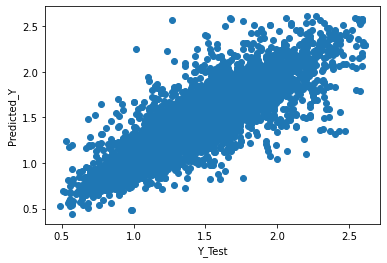

In [87]:
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y_Test')
plt.ylabel('Predicted_Y')

# Hyper parameter tuning

In [88]:
from sklearn.model_selection import GridSearchCV

In [89]:
parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           }

In [90]:
GCV = GridSearchCV(DecisionTreeRegressor(),parameters,cv =3)

In [91]:
GCV.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 12],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'splitter': ['best', 'random']})

In [92]:
GCV.best_params_

{'max_depth': 12, 'min_samples_leaf': 4, 'splitter': 'best'}

In [93]:
Final_mod = DecisionTreeRegressor(max_depth=12,min_samples_leaf=4,splitter='best')

In [94]:
Final_mod.fit(X_train,y_train)
ypred_final = Final_mod.predict(X_test)

In [95]:
r2=r2_score(y_test,ypred_final)
r2

0.764678914172596

Saving the model

In [65]:
import joblib

In [66]:
joblib.dump(Final_mod,"Avocado.pkl")

['Avocado.pkl']